‘Sikka’ is a money earning app where you can earn cash rewards by completing simple offers daily
that give you sikka coins, which you can withdraw to your bank account as real money. You can
learn more about this app here Sikka
Problem Statement:
Users come to this app through different marketing channels. They use the app to complete offers
to earn money and we generate revenue in the process. Using the data furnished below, you need
to:

P1. Calculate the lifetime value (LTV) of the users acquired through different marketing channels

Before moving any forward let's just understand what we are having;
1. User signup data: This table stores the details of every user coming through different marketing channels on ‘Sikka’
app. The key columns of this data set are 'user_id', 'utm_source' and 'created_at'.

2. User offer completion data: This table stores the data of the offers completed by any ‘Sikka’ user. Columns of this table are 'user_id', 'offer_id','reward_id' and 'created_id'.

3. Rewards details: This table stores the details of every offer-reward that is in the ‘Sikka’ App. Columns of this table are 'offer_id','reward_id',offer_id', 'reward_id', 'label_in_english','total_payout_in_paise' and 'total_revenue_in_paise'.

In order to calculate the life time value of the customers from different marketing cahnnel we need to have a table that consists of 'utm_source and 'LTV'(i.e. total_revenue_in_paise).

Steps involved in the approach are:
1. We need to join the User signup data to the offer complition data considering the primary key as 'user_id', So that we can further join the mereged data to the rewards tabel in order to have total revenue column.
Code for merging the data:

        merged_data1 = signup_data[['user_id','utm_source']].merge(offer_complition_data[['user_id','reward_id']], on ='user_id', how='left')

2. Now we are having a tabel that contains 'user_id', 'utm_source' and 'reward_id'. Now we need to have Total revenue column, for that we can join the merged_data1 to Reward details tabel. 
Code for merging the data:
 
        merged_data2 = merged_data1[['utm_source','reward_id']].merge(reward_det[['reward_id','total_revenue_in_paise']], on = 'reward_id', how='left')

3. Now that we have the merged data with 'utm_source','reward_id' and 'total_revenue_in_paise', we will get rid of the unnecessary column, then we will group by the 'utm_source' column to have a clear picture and in addition to that we will be converting the revenue in paise to Rs.
Code for the final data:
 
    
        final_data = merged_data2[['app_id', 'total_revenue_in_paise']].groupby('app_id').sum('total_revenue_in_paise')
        final_data['total_revenue_in_paise'] = final_data['total_revenue_in_paise'].astype(int)
        final_data['total_revenue_in_Rs'] = (final_data['total_revenue_in_paise']/100)
        final_data.drop(['total_revenue_in_paise'],axis=1)

4. Now that we have our customer lifetime value segregated on the basis of marketing cahnnel, we can always plot a chart to have a quick comaprison of which marketing cahnnel is contributing how much to the revnue.
 Code for plotting the graph:
 
        plt.figure(figsize=(6,4))
        sns.barplot(x=final_data.index, y='total_revenue_in_Rs',palette='Set2', data=final_data)
        plt.title("Offer complitions by users on different apps", fontsize = 12)
        plt.xlabel("Marketing channel",fontsize = 10)
        plt.ylabel("Total revenue in Rs",fontsize = 10)
        print(final_data)


That's all, Now we are having our final data.

______________________________________________________________________________________________________________________________________________________________________
 

In [892]:
#Importing necessary libraries to work with
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [893]:
#Importing the datasets to work with
signup_data = pd.read_csv('Q2_users signup.csv')
offer_data = pd.read_csv('Q2_User offer data.csv')
offer_comp_data = pd.read_csv('Q2_User offer completion data.csv')
reward_det = pd.read_csv('Q2_rewards details.csv')
sikka = pd.read_csv('Q3_Sikka data.csv')
ADX = pd.read_csv('Q4_ADX_Sample_data.csv')

P2. ‘Sikka’ is a type of Incent app. There is another similar incent app called ‘Sikka Pro’. You need to
find insights from the data for both these apps and tell which app is better of these two.
The data points you can consider to find the insights:
1. Offer Initiation by users
2. Offer Completion by users
3. Rewards earned by users
4. Revenue generated

Now, we need to find out which app is better considering the various data points.
Let's start first by preprocessing the data. Steps included are as follows:
1. We are having 4 tabels to deal with, now considering the datapoints from which we need to gain insights, the first and second one talks about the ofeer initiation and complition. We will be joing the signup data to offer data in order to get the app id and further have comaparison.

2. After that we will be creating columns for recording the initiations and complitions, if the started_at and completed_at date is null the the initiatios and complitions column respectively will return 0 else 1. In this way we will be having the record of offer initiation and complition metric.

3. In order to measure the rewards earned by user and revenue generated we need to join the rewards data with offer complition data to get the app_id for comaprisons and as primary key here is the reward_id, we would be able to do that.

4. And finally plotting these data points will give us our answer which app is better and why ?

In [894]:
#Preprocessing of the data
#Left joining offer_data with signup_data on user_id
off_sign = offer_data.merge(signup_data, on='user_id', how= 'left')
#replacing all the nan value will blanks
off_sign = off_sign.replace(np.nan,'',regex=True)
#creating columns
off_sign['initiations'] = np.where(off_sign['started_at'] == '' ,0,1)
off_sign['complitions'] = np.where(off_sign['completed_at'] =='' ,0,1)
#Left joining reward_data with offer_comp_data on user_id
offc_rew = reward_det.merge(offer_comp_data[['reward_id','app_id']],on='reward_id',how='left')
#replacing all the nan value will blanks
offc_rew = offc_rew.replace(np.nan,'',regex=True)


           initiations  complitions
app_id                             
sikka              262           23
sikka_pro          237           40


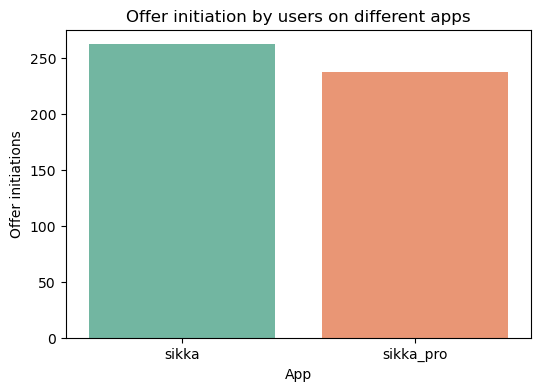

In [895]:
#creating a new dataframe from offer and signup joined data and grouping it by app_id to have acorrect picture of offer initiations and complitions.
df21= off_sign[['app_id','initiations','complitions']].groupby('app_id').sum(['initiations','complitions'])
#Using seaborn to plot the data for initiations
plt.figure(figsize=(6,4))
sns.barplot(x=df21.index, y='initiations',palette='Set2', data=df21)
plt.title("Offer initiation by users on different apps", fontsize = 12)
plt.xlabel("App",fontsize = 10)
plt.ylabel("Offer initiations",fontsize = 10)
print(df21)

           initiations  complitions
app_id                             
sikka              262           23
sikka_pro          237           40


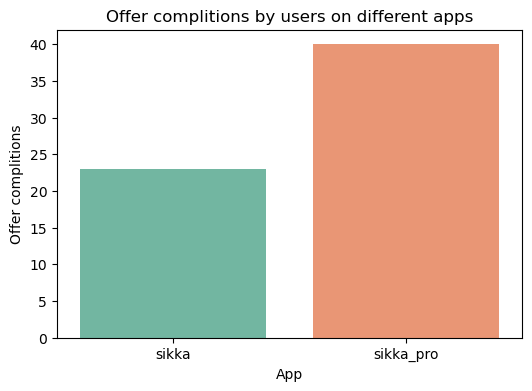

In [896]:
#Using seaborn to plot the data for complitions
plt.figure(figsize=(6,4))
sns.barplot(x=df21.index, y='complitions',palette='Set2', data=df21)
plt.title("Offer complitions by users on different apps", fontsize = 12)
plt.xlabel("App",fontsize = 10)
plt.ylabel("Offer complitions",fontsize = 10)
print(df21)

           total_payout_in_paise  total_revenue_in_paise
app_id                                                  
sikka                      18466                   39687
sikka_pro                  19618                   40457


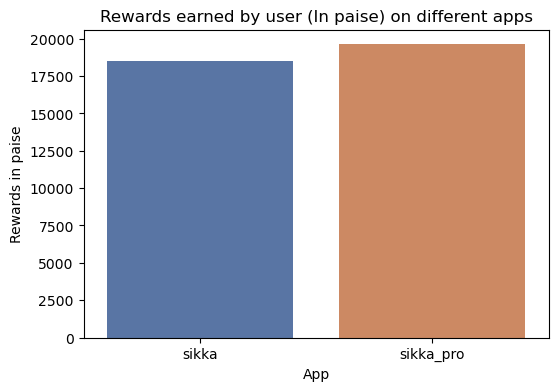

In [897]:
#creating a new dataframe from rewards and offers and complition joined data and grouping it by app_id to have a correct picture of offer rewards earned by user and revenue genearted.
offc_rew = offc_rew[(offc_rew.app_id != "")]
df22 = offc_rew[['app_id','total_payout_in_paise','total_revenue_in_paise']].groupby('app_id').sum(['total_payout_in_paise','total_revenue_in_paise'])
#Using seaborn to plot the data for rewards earned by user
plt.figure(figsize=(6,4))
sns.barplot(x=df22.index, y='total_payout_in_paise',palette='deep', data=df22)
plt.title("Rewards earned by user (In paise) on different apps", fontsize = 12)
plt.xlabel("App",fontsize = 10)
plt.ylabel("Rewards in paise",fontsize = 10)
print(df22)


           total_payout_in_paise  total_revenue_in_paise
app_id                                                  
sikka                      18466                   39687
sikka_pro                  19618                   40457


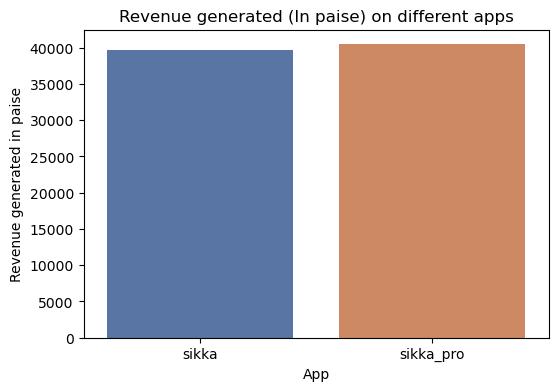

In [898]:
#Using seaborn to plot the data for revenue generated
plt.figure(figsize=(6,4))
sns.barplot(x=df22.index, y='total_revenue_in_paise',palette='deep', data=df22)
plt.title("Revenue generated (In paise) on different apps", fontsize = 12)
plt.xlabel("App",fontsize = 10)
plt.ylabel("Revenue generated in paise",fontsize = 10)
print(df22)

From the above comaprisons we can infer that:
1. Offer inititations were rougly 10% higher on Sikka app as comapred to the Sikka pro.

2. But, the offer complition was higher in Sikka pro by around 43%.

3. When we compared the Sikka and sikka pro by rewards earned, in that also Sikka pro is having an edge and was higher by 6%.

4. And at last when we compared the revenue generation by both apps in that also Sikka pro was ahead by roughly around 2%.

Therefore we can conclude that Sikka pro is better both in terms of rewards for user and reveue. Thus, the company should focus more on having Sikka pro customers as it will lead to the better customer staisfaction and revenue generation.

______________________________________________________________________________________________________________________________________________________________________

P3. Here you are given the Install numbers, uninstall numbers, daily signups, number of daily active
users and number of referrals made of the ‘Sikka’ app for the month of October 2022. Also, the
Install numbers, uninstall numbers, daily signups, number of daily active users for the first 15 days
of November is given.
You need to predict the number of referrals for these 15 days of November


Our aim for this problem will be to predict the values for next 15 days, and for that we will be using time series analysis for predicting.
By using facebook prophet.

The facebook prophet additive regression model takes the form of this expression:
* In a nutshell the additive regression model explain the relationship between independent variable i.e X, and dependent variable i.e Y.
* What I mean from Independent variable is that if you change this independent variable X, the varibale Y will be predicted according to the change.
* And the series of this X function when added up, you lead towards the additive regression model and have a prediction for Y accordingly.

In [899]:
#Importing prophet for timeseries analysis
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

In [900]:
#checking for ouliers
sikka.describe()

,DAU,Installs,Uninstalls,Signups,Referrals
count,46.000000,46.000000,46.000000,46.000000,31.000000
mean,17788.586957,5064.978261,5494.347826,2550.891304,770.161290
std,4892.080923,1624.796773,1402.885078,991.987348,249.692891
min,12042.000000,3074.000000,3815.000000,1363.000000,384.000000
25%,13380.250000,3708.750000,4321.250000,1729.500000,543.500000
50%,15059.500000,4479.500000,4738.000000,2065.500000,801.000000
75%,23472.750000,6332.000000,6741.750000,3369.000000,961.000000
max,25156.000000,8937.000000,8215.000000,4974.000000,1193.000000


In [901]:
#preprocessing of the data
sikka['Date']=pd.to_datetime(sikka['Date'], format='%Y-%m-%d')
sikka['Day'] = pd.to_datetime(sikka['Date']).dt.day

Text(0, 0.5, 'Referrals')

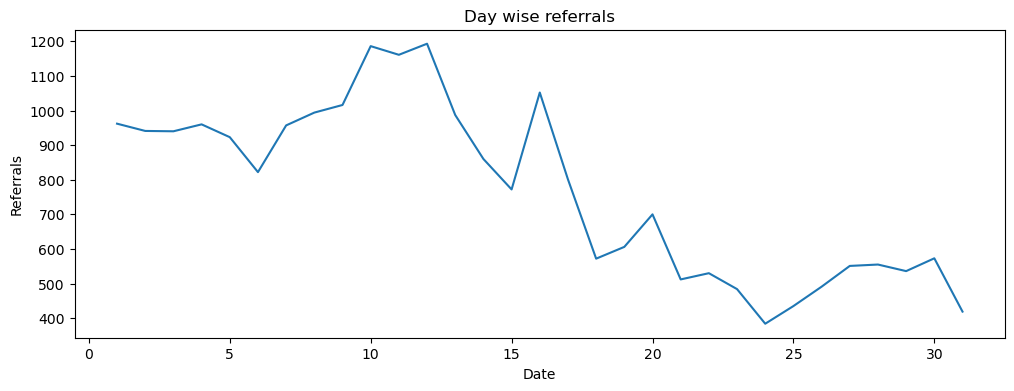

In [902]:
#plotting the graph day wise to observe the trend
plt.figure(figsize=(12,4))
sns.lineplot(x='Day', y = 'Referrals',palette='Set2', data = sikka)
plt.title("Day wise referrals", fontsize = 12)
plt.xlabel("Date",fontsize = 10)
plt.ylabel("Referrals",fontsize = 10)

In [903]:
#checking if the data types are in the correct format
sikka.dtypes

Date          datetime64[ns]
DAU                    int64
Installs               int64
Uninstalls             int64
Signups                int64
Referrals            float64
Day                    int64
dtype: object

In [904]:
#Date was an object, we needed to convert it to the correct format
sikka['Date']=pd.to_datetime(sikka['Date'], format='%Y-%m-%d')
sikka.dtypes

Date          datetime64[ns]
DAU                    int64
Installs               int64
Uninstalls             int64
Signups                int64
Referrals            float64
Day                    int64
dtype: object

In [905]:
#Creating a feature that would predict the values using facebook prophet
def predict(sikka,periods):

 sikka = sikka[['Date', 'Referrals']].rename(columns = {'Date': 'ds', 'Referrals': 'y'})
 sikka = sikka.sort_values(by = 'ds')
 sikka = sikka[:31]
 model = Prophet()
 model.fit(sikka)
 future = model.make_future_dataframe(periods = periods)
 forecast = model.predict(future)

 return model,sikka,forecast

In [906]:
model,sikka,forecast = predict(sikka,15)

00:11:59 - cmdstanpy - INFO - Chain [1] start processing
00:12:00 - cmdstanpy - INFO - Chain [1] done processing


In [907]:
#Plotting the predictied data
print(forecast['yhat'][32:])
plot_plotly(model,forecast)

32    414.316054
33    376.067789
34    332.077727
35    292.157970
36    346.511494
37    279.328723
38    237.587077
39    258.801489
40    220.553224
41    176.563162
42    136.643406
43    190.996930
44    123.814158
45     82.072512
Name: yhat, dtype: float64


Now here we have predicted the values for next 15 days. And we can clearly observe that the refferals are going down and so on the DAU, Installs and Signups. In order to safeguard from further decrease comapnty should focus on new ways to tap the customers, provide some extra benefits to the users who will refer.
______________________________________________________________________________________________________________________________________________________________________

ADX is an ad exchange platform for large publishers with significant sales. It supports both Web
and mobile apps & game inventories. Through ADX, publishers can sell their ad inventory to
advertisers and agencies using real-time bidding technology. AdX provides more efficient usage of
ad spaces using real-time auctions.

P4. A sample dataset with data for a few apps which uses ADX is given from the month of October.
You need to find out if there is any anomaly present in the data for any of the apps present
in the sample dataset. The metrics you can look into are the requests, impressions, clicks,
revenue, show-rate( impressions/responses ), click-rate (clicks/impressions) or any other feature
which you think will be helpful to gain more insight about any anomaly.

The aim of this analysis will be identify the anomaly present in the dataset.
Procedure that we will be following are:
1. Getting know about the data like about its shape, how does the data look like, what are the column present, identifying the null values if there are any and more.

2. After that we will be adding some column to have better picture of the data.

3. Next we will be plotting graph on the basis of apps to see which app's data is having the outlier.

4. Then, we will be focusing on the app that are having outliers and will generate z score for every feature and get the exact outliers,

In [908]:
#getting a brief about the data
ADX.head()

,date,pub_id,app_id,ad_unit_code,country,requests,ae_responses,ae_impressions,ae_clicks,ae_revenue
0,2022-10-20,1987,16243270,22832846443,Tanzania,36,36,34,0,0.035738
1,2022-10-20,1987,16243270,22832846593,Tanzania,24,24,23,0,0.064384
2,2022-10-20,1987,16243270,22832846443,Thailand,949,949,876,20,4.943878
3,2022-10-20,1987,16243270,22832846593,Thailand,1006,907,688,134,24.226836
4,2022-10-20,1987,16243270,22832827729,Thailand,373,287,156,20,2.759392


In [909]:
#finding out the shape of the data
ADX.shape

(47935, 10)

In [910]:
#Checking if there are any null values and presence of any outlier.
ADX.describe()

,pub_id,app_id,ad_unit_code,requests,ae_responses,ae_impressions,ae_clicks,ae_revenue
count,47935.000000,4.793500e+04,4.793500e+04,47935.000000,47935.000000,47935.000000,47935.000000,47935.000000
mean,413.188213,5.015577e+07,2.268402e+10,585.827808,516.918202,257.055137,13.502514,2.098320
std,893.645657,2.465772e+07,1.215869e+08,3024.686475,2579.695718,1294.313552,73.922916,27.784254
min,14.000000,1.624327e+07,2.247747e+10,16.000000,16.000000,16.000000,0.000000,0.000111
25%,14.000000,2.559680e+07,2.252151e+10,50.000000,47.000000,27.000000,0.000000,0.026047
50%,51.000000,4.786228e+07,2.275208e+10,109.000000,100.000000,52.000000,2.000000,0.112968
75%,72.000000,4.786228e+07,2.277034e+10,300.000000,275.000000,140.000000,7.000000,0.537878
max,2808.000000,9.567477e+07,2.283576e+10,156435.000000,156296.000000,69448.000000,6853.000000,2137.181915


From the above statistical report we can clearly see that that standard deviation of 'requests',	'ae_responses',	'ae_impressions', 'ae_clicks' and 'ae_revenue' column are very high as comapred to the mean of these columns. This signifies two cases either most of the data present in these columns are very far from the mean or there are some extreme outliers that are responsilble for this. Let's dig deeper into this and see what is the case.

In [911]:
#adding columns for Show and click rate in the data
ADX['show_rate'] = ADX['ae_impressions']/ADX['ae_responses']
ADX['click_rate'] = ADX['ae_clicks']/ADX['ae_impressions']

In [912]:
# Creating a new data frame and Grouping by the app id to further plot the whole dataset for infering the highest revenue generation app
df = ADX[['app_id','ae_revenue']].groupby('app_id').sum('ae_revenue').sort_values(by='ae_revenue',ascending=False)

            ae_revenue
app_id                
22693095  51191.627809
40931528  21900.482256
43840611   5373.715967
16243270   4245.317619
25596802   4077.663850
63338696   3269.125146
47862278   3191.668051
95674771   2868.401602
84650721   2387.244188
66981243   2077.719197


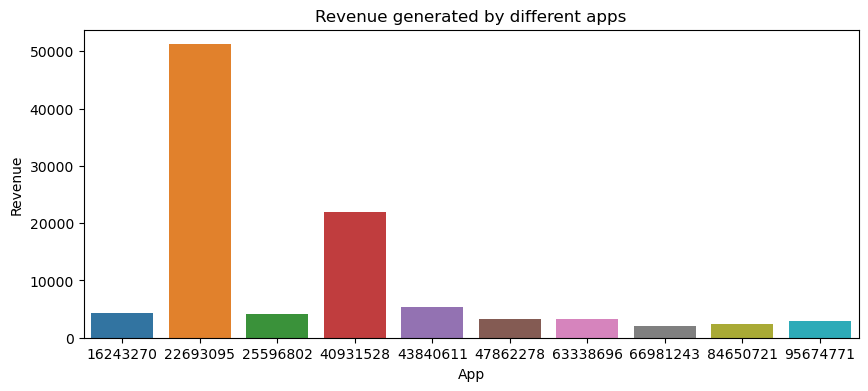

In [913]:
#Now that we have added columns and grouped the data, let's understand which app is contributing how much to the revenue by plotting it
plt.figure(figsize=(10,4))
sns.barplot(x=df.index, y='ae_revenue', data= df)
plt.title("Revenue generated by different apps", fontsize = 12)
plt.xlabel("App",fontsize = 10)
plt.ylabel("Revenue",fontsize = 10)
print(df)

What we can infer from this graph is that for the app id '22693095' and '40931528' the revenue is abnormally high.
Now we will be creating specific dataframe for these app ids and we will be detecting the anomalies thatare causing this.

In [914]:
#creating dataframes for the abnormally high revenue generating apps
app_1 = ADX[(ADX.app_id == 22693095)]
app_2 = ADX[(ADX.app_id == 40931528)]

In [915]:
#droping the unnecessary columns
app_1 = app_1.drop(['date', 'pub_id', 'ad_unit_code'],axis = 1)
app_2 = app_2.drop(['date', 'pub_id', 'ad_unit_code'],axis = 1)

In [916]:
#grouping by both of the data by country that will help us undertand in which country the revenue got abnormally high 
app_1 = app_1.groupby(['app_id', 'country']).sum('ae_revenue')
app_2 = app_2.groupby(['app_id', 'country']).sum('ae_revenue')

Now, let's just the plot these metrics on the scatter plot and observe the ouliers in the data. 
Plots for the app_1 data:

<AxesSubplot:xlabel='ae_revenue', ylabel='ae_impressions'>

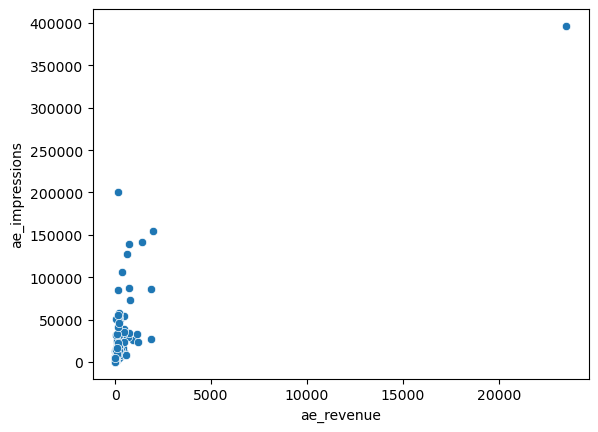

In [917]:
#Using seaborn to plot for the app_1 data
sns.scatterplot(x='ae_revenue', y='ae_impressions', data=app_1)

<AxesSubplot:xlabel='ae_revenue', ylabel='requests'>

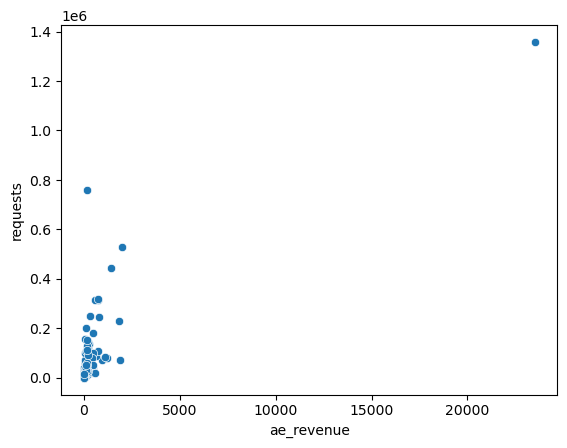

In [918]:
sns.scatterplot(x='ae_revenue', y='requests', data=app_1)

<AxesSubplot:xlabel='ae_revenue', ylabel='ae_responses'>

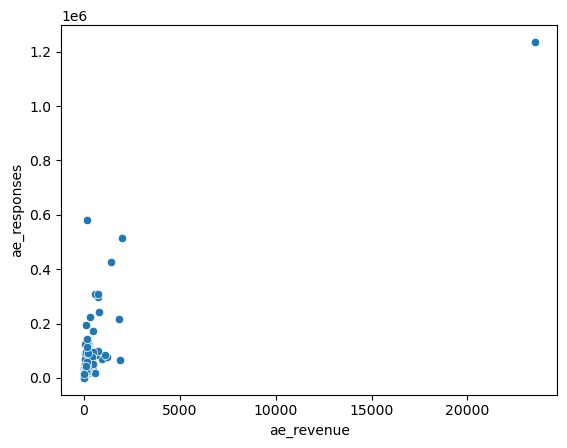

In [919]:
sns.scatterplot(x='ae_revenue', y='ae_responses', data=app_1)

<AxesSubplot:xlabel='ae_revenue', ylabel='ae_clicks'>

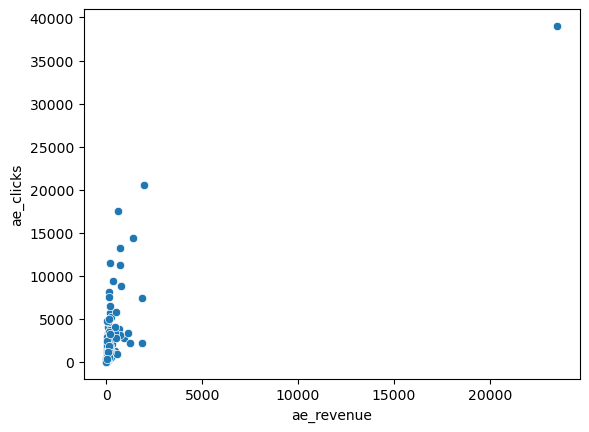

In [920]:
sns.scatterplot(x='ae_revenue', y='ae_clicks', data=app_1)

Plots for the app_2 data:

<AxesSubplot:xlabel='ae_revenue', ylabel='requests'>

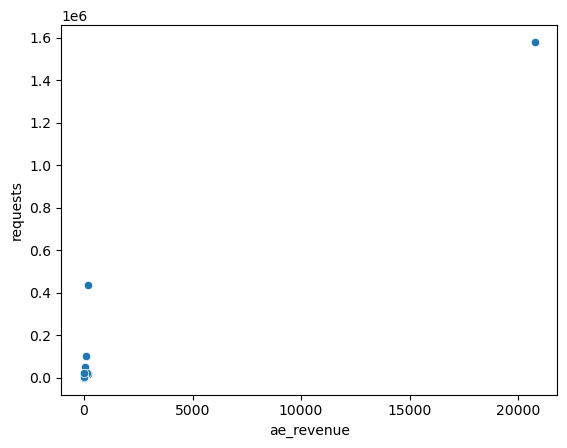

In [921]:
#Using seaborn to plot for the app_2 data
sns.scatterplot(x='ae_revenue', y='requests', data=app_2)

<AxesSubplot:xlabel='ae_revenue', ylabel='ae_responses'>

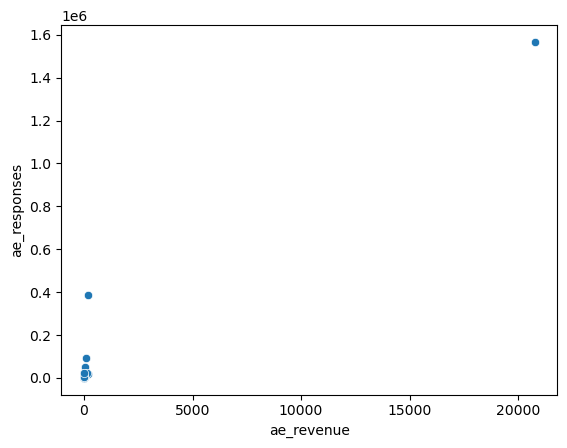

In [922]:
sns.scatterplot(x='ae_revenue', y='ae_responses', data=app_2)

<AxesSubplot:xlabel='ae_revenue', ylabel='ae_impressions'>

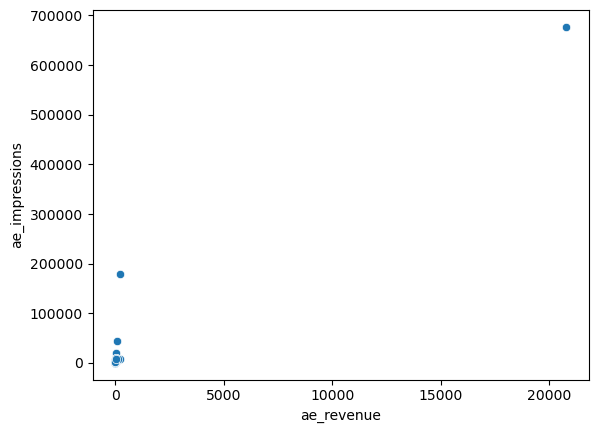

In [923]:
sns.scatterplot(x='ae_revenue', y='ae_impressions', data=app_2)

<AxesSubplot:xlabel='ae_revenue', ylabel='ae_clicks'>

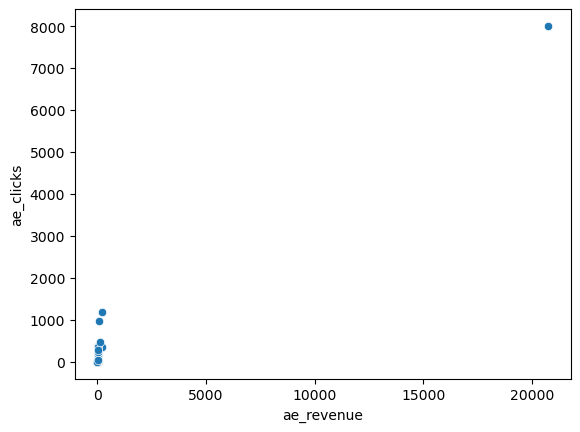

In [924]:
sns.scatterplot(x='ae_revenue', y='ae_clicks', data=app_2)

After plotting all the graphs we clearly see that in every of the metrics of both app there is an outllier that is far from the distribution.
The revenue is abnoramlly high with respect to the requests, impressions, clicks and responses.

Now, our next step involves finding the exact anomalies in the data.
And for that we are going to calculate the z_score. 
1. Let's first know what is z_score with an example: Lets say there is an array of number till 10, for these 10 numbers z score will be calculated by 
Substracting calculated mean of the data from the items in array then dividing the whole by the standard deviation of the data and then the z score is generated.
Through the Z score we can judge the values if it is away from the mean(Positively or negatively) or not. Generally if the z score is greater than 3 or less then -3. that value is considered as an outlier. 

2. We will be creating a for loop that generates the z_score for all the columns present in the data set of both apps.

3. Then we will creating dataframes for the outliers.

In [925]:
#for loop to generate the zscore for app1
for col in app_1.columns:
    col_zscore = col + '_zscore'
    app_1[col_zscore] = (app_1[col]-app_1[col].mean())/app_1[col].std(ddof=0)

In [926]:
app_1

requests  ae_responses  ae_impressions  ae_clicks  \
app_id   country                                                             
22693095 Afghanistan          571           495             196         17   
         Albania            36969         35439           12951       1460   
         Algeria            40754         35030           14247        973   
         Andorra               78            78              40         13   
         Angola             37392         33461           11820       1516   
...                           ...           ...             ...        ...   
         Vietnam            59608         56879           22940       1836   
         Western Sahara       906           893             410         33   
         Yemen                237           235             153         10   
         Zambia             51554         42933           16425       1196   
         Zimbabwe           14017         13101            4861        299   

                         ae_revenue  show_rate  click_rate  requests_zscore  \
app_id   country                                                              
22693095 Afghanistan       0.345175   4.172300    0.856984        -0.396519   
         Albania          52.230963  31.644676    7.785241        -0.113079   
         Algeria          17.112385  43.477553    6.497883        -0.083604   
         Andorra           1.351628   1.040761    0.681818        -0.400359   
         Angola           47.706650  33.276280   10.249056        -0.109785   
...                             ...        ...         ...              ...   
         Vietnam         153.861943  43.499355    7.168897         0.063217   
         Western Sahara    0.736768   7.885361    1.410989        -0.393911   
         Yemen             0.072625   3.882742    0.499272        -0.399120   
         Zambia           92.289406  48.255017    7.614875         0.000498   
         Zimbabwe          8.533728  25.144683    4.103592        -0.291812   

                         ae_responses_zscore  ae_impressions_zscore  \
app_id   country                                                      
22693095 Afghanistan               -0.401922              -0.441164   
         Albania                   -0.100558              -0.116804   
         Algeria                   -0.104085              -0.083847   
         Andorra                   -0.405519              -0.445131   
         Angola                    -0.117617              -0.145565   
...                                      ...                    ...   
         Vietnam                    0.084345               0.137217   
         Western Sahara            -0.398490              -0.435722   
         Yemen                     -0.404165              -0.442257   
         Zambia                    -0.035928              -0.028460   
         Zimbabwe                  -0.293206              -0.322533   

                         ae_clicks_zscore  ae_revenue_zscore  \
app_id   country                                               
22693095 Afghanistan            -0.447700          -0.152346   
         Albania                -0.083284          -0.121403   
         Algeria                -0.206271          -0.142346   
         Andorra                -0.448710          -0.151745   
         Angola                 -0.069142          -0.124101   
...                                   ...                ...   
         Vietnam                 0.011671          -0.060795   
         Western Sahara         -0.443659          -0.152112   
         Yemen                  -0.449468          -0.152508   
         Zambia                 -0.149955          -0.097514   
         Zimbabwe               -0.376484          -0.147462   

                         show_rate_zscore  click_rate_zscore  
app_id   country                                              
22693095 Afghanistan            -1.321816          -1.293707  
         Albania                 0.2

In [927]:
#for loop to generate the zscore for app2
for col in app_2.columns:
    col_zscore = col + '_zscore'
    app_2[col_zscore] = (app_2[col]-app_2[col].mean())/app_2[col].std(ddof=0)

In [928]:
#creating dataframes for the outliers for the app1
req_outliers1 = app_1[['requests','requests_zscore']]
req_outliers1 =  req_outliers1[(req_outliers1.requests_zscore>3) | (req_outliers1.requests_zscore<-3)]

click_outliers1 = app_1[['ae_clicks','ae_clicks_zscore']]
click_outliers1 =  click_outliers1[(click_outliers1.ae_clicks_zscore>3) | (click_outliers1.ae_clicks_zscore<-3)]

res_outliers1 = app_1[['ae_responses','ae_responses_zscore']]
res_outliers1 =  res_outliers1[(res_outliers1.ae_responses_zscore>3) | (res_outliers1.ae_responses_zscore<-3)]

imp_outliers1 = app_1[['ae_impressions','ae_impressions_zscore']]
imp_outliers1 =  imp_outliers1[(imp_outliers1.ae_impressions_zscore>3) | (imp_outliers1.ae_impressions_zscore<-3)]

rev_outliers1 = app_1[['ae_revenue','ae_revenue_zscore']]
rev_outliers1 =  rev_outliers1[(rev_outliers1.ae_revenue_zscore>3) | (rev_outliers1.ae_revenue_zscore<-3)]

click_rate1 = app_1[['click_rate','click_rate_zscore']]
click_rate1 =  click_rate1[(click_rate1.click_rate_zscore>3) | (click_rate1.click_rate_zscore<-3)]

show_rate1 = app_1[['show_rate','show_rate_zscore']]
show_rate1 =  show_rate1[(show_rate1.show_rate_zscore>3) | (show_rate1.show_rate_zscore<-3)]

In [929]:
#creating dataframes for the outliers for the app1
req_outliers2 = app_2[['requests','requests_zscore']]
req_outliers2 =  req_outliers2[(req_outliers2.requests_zscore>3) | (req_outliers2.requests_zscore<-3)]

click_outliers2 = app_2[['ae_clicks','ae_clicks_zscore']]
click_outliers2 =  click_outliers2[(click_outliers2.ae_clicks_zscore>3) | (click_outliers2.ae_clicks_zscore<-3)]

res_outliers2 = app_2[['ae_responses','ae_responses_zscore']]
res_outliers2 =  res_outliers2[(res_outliers1.ae_responses_zscore>3) | (res_outliers2.ae_responses_zscore<-3)]

imp_outliers2 = app_2[['ae_impressions','ae_impressions_zscore']]
imp_outliers2 =  imp_outliers2[(imp_outliers2.ae_impressions_zscore>3) | (imp_outliers2.ae_impressions_zscore<-3)]

rev_outliers2 = app_2[['ae_revenue','ae_revenue_zscore']]
rev_outliers2 =  rev_outliers2[(rev_outliers2.ae_revenue_zscore>3) | (rev_outliers2.ae_revenue_zscore<-3)]

click_rate2 = app_2[['click_rate','click_rate_zscore']]
click_rate2 =  click_rate2[(click_rate2.click_rate_zscore>3) | (click_rate2.click_rate_zscore<-3)]

show_rate2 = app_2[['show_rate','show_rate_zscore']]
show_rate2 =  show_rate2[(show_rate2.show_rate_zscore>3) | (show_rate2.show_rate_zscore<-3)]

C:\Users\amank\AppData\Local\Temp\ipykernel_18492\683349592.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [930]:
#Printing all the outliers for the app1
print(req_outliers1)
print(click_outliers1) 
print(res_outliers1) 
print(imp_outliers1)
print(rev_outliers1)
print(show_rate1)
print(click_rate1)

                        requests  requests_zscore
app_id   country                                 
22693095 Brazil           527526         3.707015
         India            757732         5.499688
         Mexico           444929         3.063811
         United States   1357911        10.173437
                        ae_clicks  ae_clicks_zscore
app_id   country                                   
22693095 Brazil             20530          4.732662
         Mexico             14383          3.180296
         Morocco            17497          3.966707
         United States      39018          9.401630
                        ae_responses  ae_responses_zscore
app_id   country                                         
22693095 Brazil               516644             4.049456
         India                579550             4.591970
         Mexico               428159             3.286342
         United States       1236261            10.255585
                        ae_impressions  

In [931]:
#Printing all the outliers for the app2
print(req_outliers2)
print(click_outliers2) 
print(res_outliers2) 
print(imp_outliers2)
print(rev_outliers2)
print(show_rate2)
print(click_rate2)

                    requests  requests_zscore
app_id   country                             
40931528 Australia   1580002         9.518265
                    ae_clicks  ae_clicks_zscore
app_id   country                               
40931528 Australia       8005           9.67392
Empty DataFrame
Columns: [ae_responses, ae_responses_zscore]
Index: []
                    ae_impressions  ae_impressions_zscore
app_id   country                                         
40931528 Australia          676946                9.55193
                      ae_revenue  ae_revenue_zscore
app_id   country                                   
40931528 Australia  20766.244446           9.898315
Empty DataFrame
Columns: [show_rate, show_rate_zscore]
Index: []
                       click_rate  click_rate_zscore
app_id   country                                    
40931528 Senegal         3.329090            3.04885
         Sierra Leone    3.868298            3.70478


Now what we can infer form the list of outliers for both the apps, let's see:

For the App 1(App id - 22693095)

1. In the country Brazil, India, Mexico and United States considering the revenue, impressions, clicks and requests, there are some adnormally high values especially in United states.

2. For the metric click rate and show rate it looks like there are no outliers.

For the App 2(App id - 40931528)

1. In the country Australia considering the revenue, impressions, clicks and requests, there are some adnormally high values.

2. Considering the metric shwo rate for country Senegal and Sierra Leone there are a bit high values.